# Milk Quality Prediction using Random Forest, Gradient Boosting and Naive Bayes Classifiers

The data is available at https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
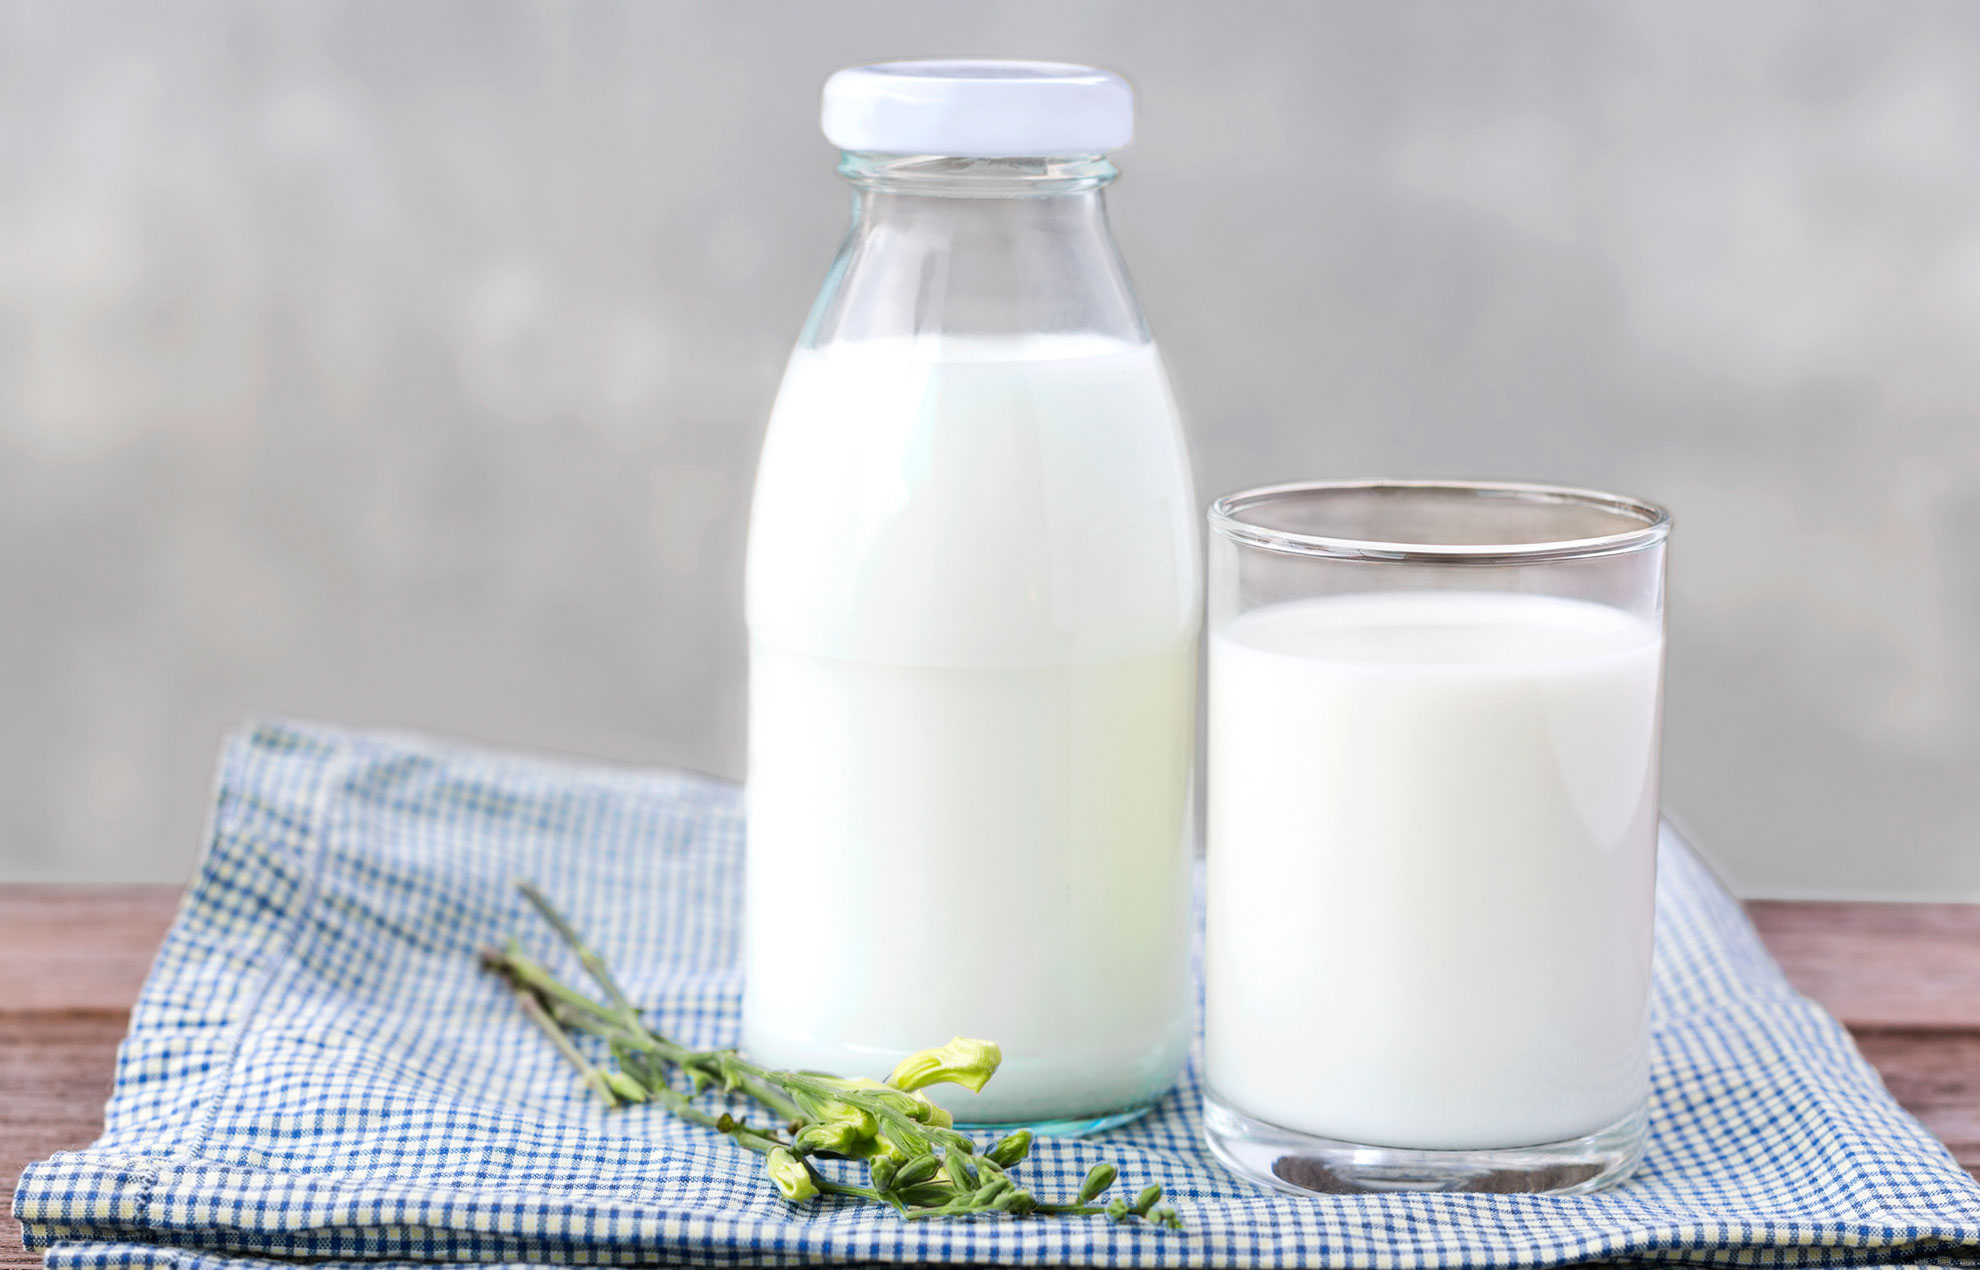
Photo credit: Dairy Farmers of Canada

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 14

In [2]:
# Read in data

df = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\ML\classification\milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


## Data Cleaning

In [3]:
# Check for missing data

df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [4]:
# There was no missing data, therefore no cleaning will be done.

## Exploratory Data Analysis

In [5]:
df.describe().round()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0,1059.0
mean,7.0,44.0,1.0,0.0,1.0,0.0,252.0
std,1.0,10.0,0.0,0.0,0.0,1.0,4.0
min,3.0,34.0,0.0,0.0,0.0,0.0,240.0
25%,6.0,38.0,0.0,0.0,0.0,0.0,250.0
50%,7.0,41.0,1.0,0.0,1.0,0.0,255.0
75%,7.0,45.0,1.0,1.0,1.0,1.0,255.0
max,10.0,90.0,1.0,1.0,1.0,1.0,255.0


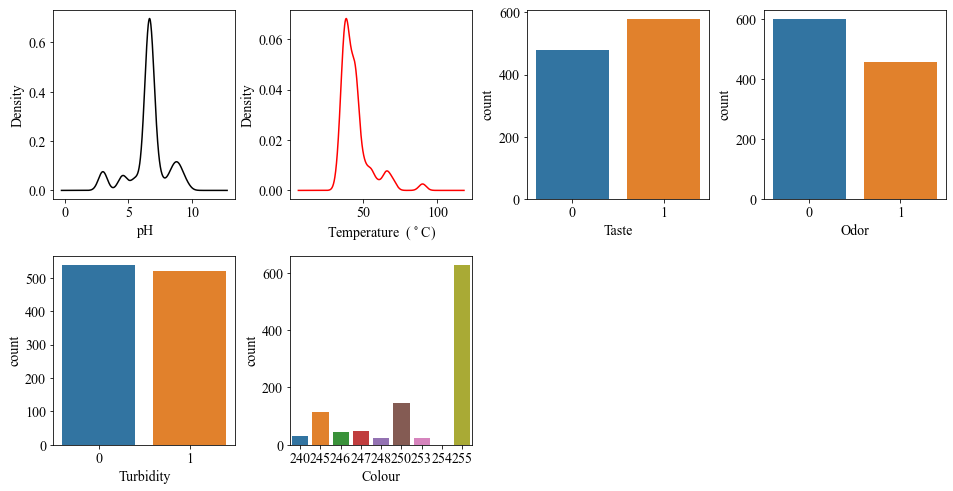

In [6]:
# Plot density plots for pH and temperature to check the data distribution. 
# The other data are encoded, so will only do count plots

fig, ax = plt.subplots(figsize=(16,8))
plt.gcf().subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2,4,1)
df['pH'].plot.kde(color='k')
plt.xlabel('pH')

plt.subplot(2,4,2)
df['Temprature'].plot.kde(color='red')
plt.xlabel('Temperature  ($^\circ$C)')

plt.subplot(2,4,3)
sns.countplot(df['Taste'])

plt.subplot(2,4,4)
sns.countplot(df['Odor'])

plt.subplot(2,4,5)
sns.countplot(df['Turbidity'])

plt.subplot(2,4,6)
sns.countplot(df['Colour'])
plt.show()

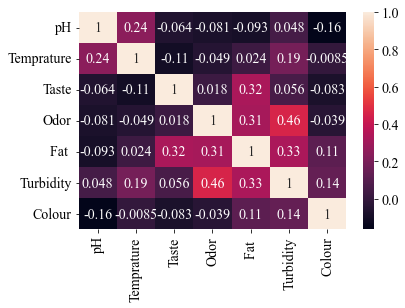

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Data Preprocessing for Classification

In [8]:
# Select X and y

X = df.drop(['Grade'], axis=1)
y = df['Grade']

In [9]:
# Scale the data

scaler = preprocessing.MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667
2,0.846154,0.642857,1.0,1.0,1.0,1.0,0.400000
3,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000
4,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000


In [10]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Do Classification

In [11]:
# Using Random Forest Classifier
rf = RandomForestClassifier()
clf_rf = rf.fit(X_train, y_train)
rf_pred = clf_rf.predict(X_test)

# Using Gradient Boosting Classifier
gb = GradientBoostingClassifier()
clf_gb = gb.fit(X_train, y_train)
gb_pred = clf_gb.predict(X_test)

# Using Naive Bayes Classifier
nb = CategoricalNB()
clf_nb = nb.fit(X_train, y_train)
nb_pred = clf_nb.predict(X_test)

## Model Evaluation

               Model       acc
0      Random Forest  1.000000
1  Gradient Boosting  1.000000
2        Naive Bayes  0.613208


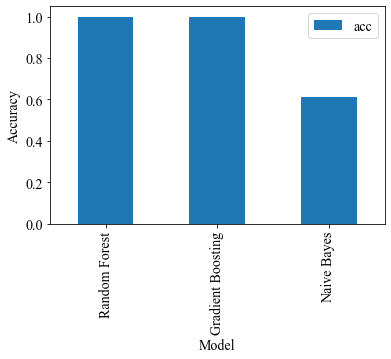

In [12]:
# Compute accuracy values

acc_rf = accuracy_score(y_test, rf_pred)
acc_gb = accuracy_score(y_test, gb_pred)
acc_nb = accuracy_score(y_test, nb_pred)

acc_df = pd.DataFrame({"Model":['Random Forest', 'Gradient Boosting', 'Naive Bayes'],"acc":[acc_rf, acc_gb, acc_nb]})

print(acc_df)
acc_df.plot.bar(x='Model', y='acc')
plt.ylabel('Accuracy')
plt.show()

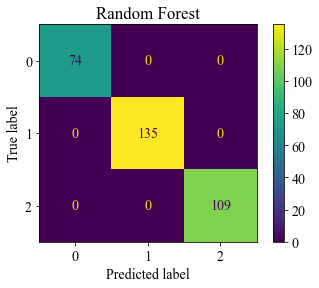

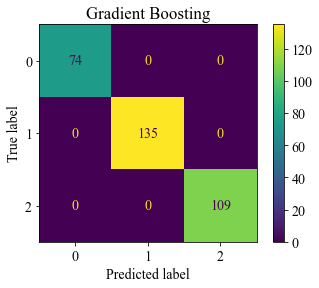

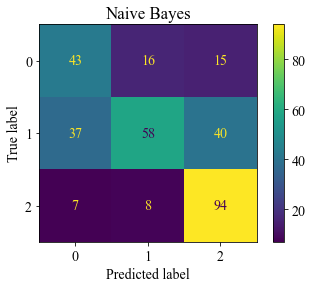

In [13]:
# Plot Confusion Matrices

cm_rf = confusion_matrix(y_test, rf_pred)
cm_rf_d = ConfusionMatrixDisplay(cm_rf)
cm_rf_d.plot()
plt.title('Random Forest')

cm_gb = confusion_matrix(y_test, gb_pred)
cm_gb_d = ConfusionMatrixDisplay(cm_gb)
cm_gb_d.plot()
plt.title('Gradient Boosting')

cm_nb = confusion_matrix(y_test, nb_pred)
cm_nb_d = ConfusionMatrixDisplay(cm_nb)
cm_nb_d.plot()
plt.title('Naive Bayes')
plt.show()

## Conclusion

### The Random Forest and Gradient Boosting Classifiers achieved the best accuracy of 100%.